In [14]:
pip install yfinance==0.2.28

In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [16]:
initial_data = yf.download("BABA ^VIX", start="2021-11-01", end="2023-11-01")

[*********************100%%**********************]  2 of 2 completed


In [17]:
initial_data.head()

Adj Close                  Close                   High  \
                  BABA       ^VIX        BABA       ^VIX        BABA   
Date                                                                   
2021-11-01  170.169998  16.410000  170.169998  16.410000  171.895004   
2021-11-02  162.899994  16.030001  162.899994  16.030001  167.100006   
2021-11-03  166.240005  15.100000  166.240005  15.100000  166.649994   
2021-11-04  164.789993  15.440000  164.789993  15.440000  169.940002   
2021-11-05  158.729996  16.480000  158.729996  16.480000  164.794998   

                              Low               Open               Volume       
                 ^VIX        BABA   ^VIX        BABA       ^VIX      BABA ^VIX  
Date                                                                            
2021-11-01  17.700001  165.800003  16.32  165.839996  16.850000  17609500    0  
2021-11-02  16.650000  162.759995  15.89  167.100006  16.540001  19072900    0  
2021-11-03  16.389999  163.110001  14.90  165.360001  16.110001  13569700    0  
2021-11-04  16.139999  164.500000  14.73  169.279999  15.060000  16669200    0  
2021-11-05  17.020000  158.300003  14.95  164.794998  15.590000  22098200    0

In [18]:
initial_data['Adj Close'].head()

,BABA,^VIX
Date,,
2021-11-01,170.169998,16.410000
2021-11-02,162.899994,16.030001
2021-11-03,166.240005,15.100000
2021-11-04,164.789993,15.440000
2021-11-05,158.729996,16.480000


In [19]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-11-01 to 2023-10-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BABA    503 non-null    float64
 1   ^VIX    503 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB


# Stock Price Movement Plot

[*********************100%%**********************]  1 of 1 completed


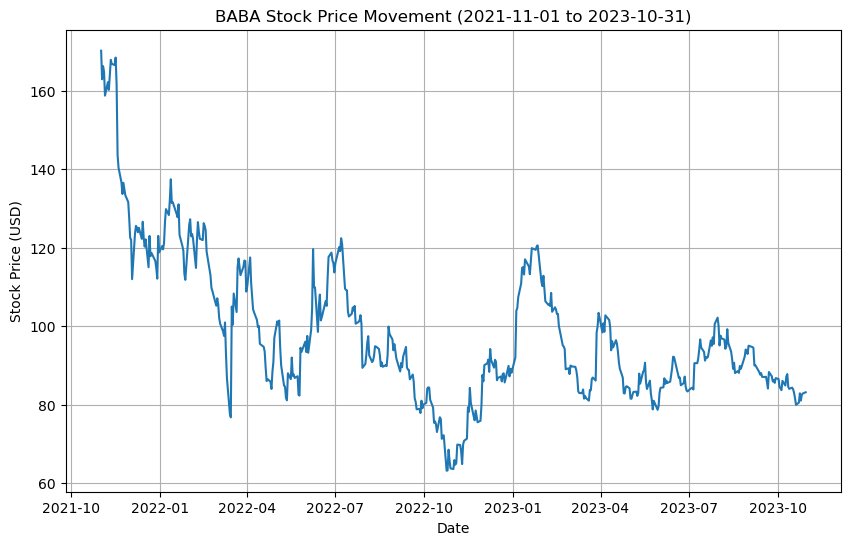

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbol and time period
stock_symbol = "BABA"
start_date = "2021-11-01"
end_date = "2023-10-31"

# Download historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# Plot the stock price movement
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Adj Close'])
plt.title(f'{stock_symbol} Stock Price Movement ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)
plt.show()


# Annualized Average Return and Standard Deviation

In [20]:
df = pd.read_csv('BABA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-01,165.839996,171.895004,165.800003,170.169998,170.169998,17609500
1,2021-11-02,167.100006,167.100006,162.759995,162.899994,162.899994,19072900
2,2021-11-03,165.360001,166.649994,163.110001,166.240005,166.240005,13569700
3,2021-11-04,169.279999,169.940002,164.500000,164.789993,164.789993,16669200
4,2021-11-05,164.794998,164.794998,158.300003,158.729996,158.729996,22098200


In [21]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
498,2023-10-25,81.300003,82.000000,80.779999,81.029999,81.029999,11390200
499,2023-10-26,81.264999,83.089996,81.199997,82.510002,82.510002,13010400
500,2023-10-27,83.870003,84.120003,82.480003,82.820000,82.820000,10795600
501,2023-10-30,83.629997,84.239998,83.011002,83.139999,83.139999,8980500
502,2023-10-31,81.940002,82.540001,80.879997,82.540001,82.540001,12094300


In [22]:
# Calculate normal return
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.04272200790647009,
 0.020503444585762257,
 -0.008722401085105759,
 -0.03677405945396217,
 0.021609072553621097]

In [23]:
# Calculate log return
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.04366144685480603,
 0.02029607865232781,
 -0.008760663883581784,
 -0.037467273160207634,
 0.021378906426615243]

In [24]:
#Changing the list variable to numpy array:
normal_return=np.array(normal_return)
#calculating the mean and standard deviation on normal returns using numpy:
mean_nr = normal_return.mean() * len(normal_return)
sd_nr = normal_return.std() * (len(normal_return) ** 0.5)
print(f'Annualized Average Return: {mean_nr:.4%}')
print(f'Annualized Standard Deviation: {sd_nr:.4%}')

Annualized Average Return: -35.4614%
Annualized Standard Deviation: 87.6670%


In [25]:
#Changing the list variable to numpy array:
log_return=np.array(log_return)
#calculating the mean and standard deviation on log returns using numpy:
mean_logr = log_return.mean() * len(log_return)
sd_logr = log_return.std() * (len(log_return) ** 0.5)
print(f'Annualized Average Return: {mean_logr:.4%}')
print(f'Annualized Standard Deviation: {sd_logr:.4%}')

Annualized Average Return: -72.3515%
Annualized Standard Deviation: 85.0817%


# Summary Statistics

In [26]:
data.describe().round(2)

,BABA,^VIX
count,503.00,503.00
mean,98.23,21.78
std,18.90,5.39
min,63.15,12.82
25%,85.85,17.64
50%,92.90,21.09
75%,108.63,25.71
max,170.17,36.45


In [27]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,BABA,^VIX
Date,,
2021-11-01,NaN,NaN
2021-11-02,-0.0437,-0.0234
2021-11-03,0.0203,-0.0598
2021-11-04,-0.0088,0.0223
2021-11-05,-0.0375,0.0652


<Axes: xlabel='Date'>

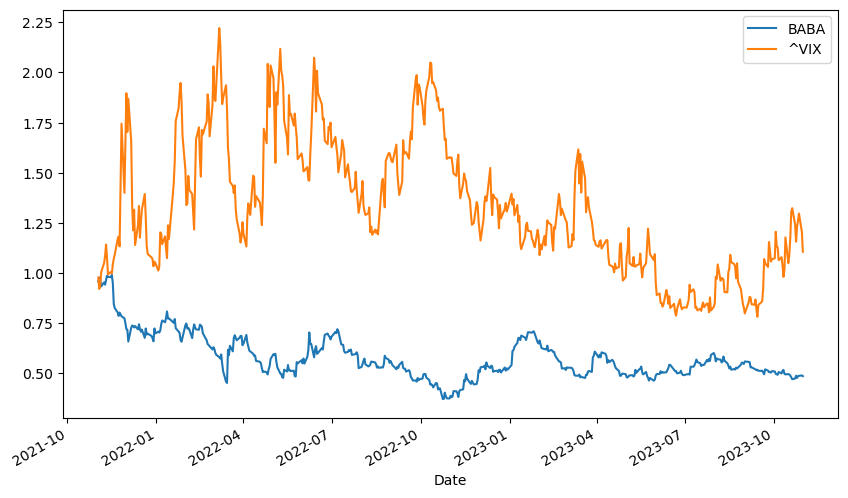

In [28]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

Text(0.5, 1.0, 'Adjusted Closing Price')

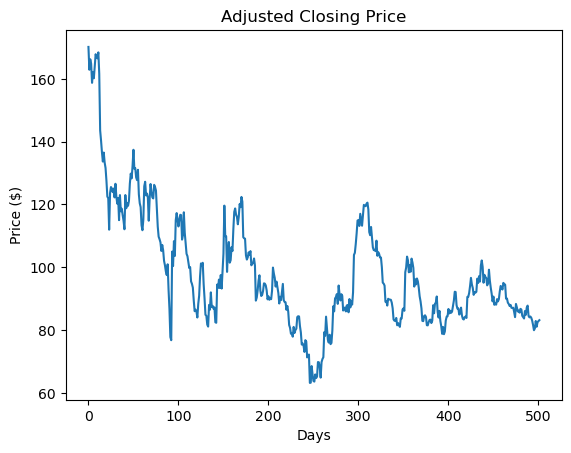

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Adj Close']) #choosing the series you want to plot
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Adjusted Closing Price')

Text(0.5, 1.0, 'Log Return')

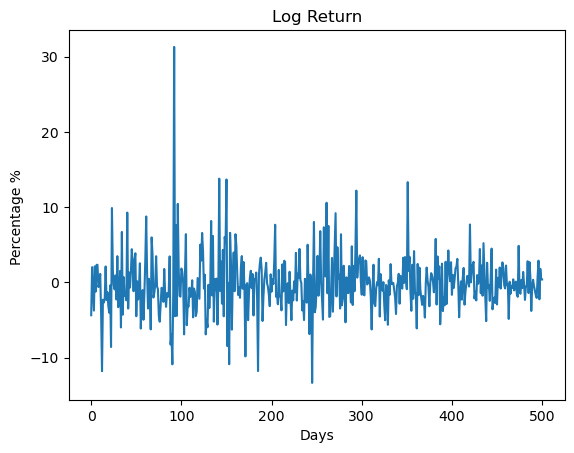

In [26]:
fig = plt.figure()
plt.plot(log_return * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return')

In [42]:
# Calculate 3-month rolling standard deviation
rolling_std_3months = stock_data['Daily_Return'].rolling(window=3*21).std()  # Assuming 21 trading days in a month
print("3-Month Rolling Standard Deviation:")
print(rolling_std_3months.dropna())

3-Month Rolling Standard Deviation:
Date
2022-02-01    0.038571
2022-02-02    0.038446
2022-02-03    0.038337
2022-02-04    0.038340
2022-02-07    0.038782
                ...   
2023-10-25    0.021272
2023-10-26    0.020214
2023-10-27    0.020088
2023-10-30    0.019987
2023-10-31    0.019051
Name: Daily_Return, Length: 440, dtype: float64


# Binomial Tree

In [30]:
S0 = 82.5              # spot stock price
K = 83.5               # strike
T = 3/12                 # maturity 
r = 0.0533                 # risk free rate 
sigma = 0.02               # standard deviation (volatility)
N = 3                   # number of periods or number of time steps  
payoff = "call"          # payoff 

In [31]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 
print(f"Up factor (u): {u}")
print(f"Down factor (d): {d}")

Up factor (u): 1.0057902014799276
Down factor (d): 0.9942431319459984


In [140]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1): #looping forwards, from 1 to N
    for i in range(z):  #looping forwards, from 0 to z-1
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1  # same as z=z+1

In [141]:
S

array([[82.5       , 82.97769162, 83.45814917, 83.94138867],
       [ 0.        , 82.02505839, 82.5       , 82.97769162],
       [ 0.        ,  0.        , 81.55285095, 82.02505839],
       [ 0.        ,  0.        ,  0.        , 81.08336194]])

In [132]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.8840696345329057

In [142]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.44138867],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [143]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.3009495 , 0.34192917, 0.38848895, 0.44138867],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [144]:
print('European ' + payoff, str( V[0,0]))

European call 0.3009495045480285


In [145]:
payoff = "put" 

In [146]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.52230838],
       [0.        , 0.        , 0.        , 1.47494161],
       [0.        , 0.        , 0.        , 2.41663806]])

In [147]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.19569214, 0.12576412, 0.06028305, 0.        ],
       [0.        , 0.73646819, 0.62994328, 0.52230838],
       [0.        , 0.        , 1.57709233, 1.47494161],
       [0.        , 0.        , 0.        , 2.41663806]])

In [148]:
print('European ' + payoff, str( V[0,0]))

European put 0.19569213544319675


# Monte Carlo Simulation

In [149]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])    
    return S

In [150]:
T = 3/12
r = 0.0533
sigma = 0.02
S0 = 82.5
K = 83.5

In [151]:
S = mcs_simulation_np(1000)

In [152]:
S = np.transpose(S)
S

array([[82.5       , 82.50265945, 82.48599024, ..., 81.78674597,
        81.77232531, 81.7293812 ],
       [82.5       , 82.451711  , 82.42524998, ..., 84.46526148,
        84.4812303 , 84.45391686],
       [82.5       , 82.52877512, 82.53467674, ..., 83.60181368,
        83.58398848, 83.57728377],
       ...,
       [82.5       , 82.46170769, 82.46349961, ..., 84.42314594,
        84.46674284, 84.50049666],
       [82.5       , 82.4903098 , 82.4651873 , ..., 82.19475589,
        82.2061349 , 82.18363534],
       [82.5       , 82.50236212, 82.5128208 , ..., 84.87776189,
        84.87596385, 84.90882861]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

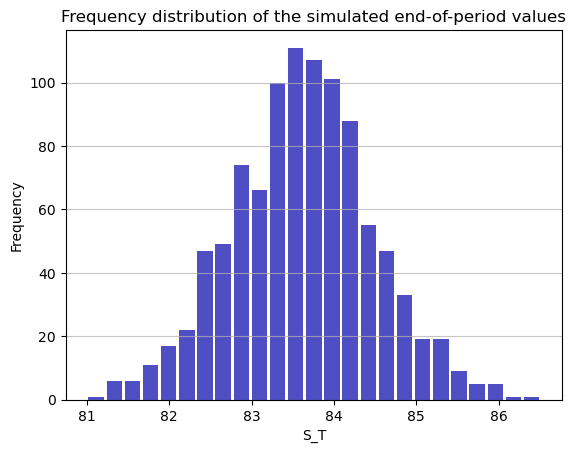

In [156]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [154]:
c = np.exp(-r*T)*np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.39755421222590964


In [155]:
p = np.exp(-r*T)*np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 0.2806965462662029


# Black-Scholes Model

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [160]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [169]:
call = euro_option_bs(82.50, 83.50, 0.25, 0.0533, 0.02, 'call')
print('The Black-Scholes call price is', round(call, 2))

The Black-Scholes call price is 0.38


In [171]:
put = euro_option_bs(82.50, 83.50, 0.25, 0.0533, 0.02, 'put')
print('The Black-Scholes put price is', round(put, 2))

The Black-Scholes put price is 0.28


In [172]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bs(S[i], 83.50, 0.25, 0.0533, 0.02, 'call')
    Put [i] = euro_option_bs(S[i], 83.50, 0.25, 0.0533, 0.02, 'put')

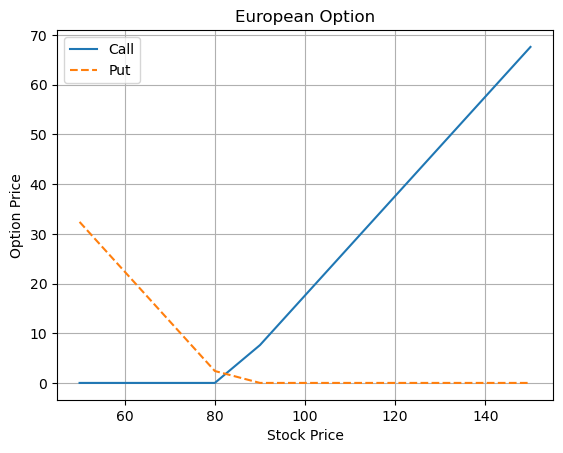

In [173]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

# Greeks

### Delta

In [174]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [176]:
delta(82.50, 83.50, 0.25, 0.0533, 0.02, 'call')

0.5527712920791097

In [177]:
delta(82.50, 83.50, 0.25, 0.0533, 0.02, 'put')

-0.4472287079208903

In [178]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 83.50, 0.25, 0.0533, 0.02, 'call')
    Delta_Put [i] = delta(S[i], 83.50, 0.25, 0.0533, 0.02, 'put')

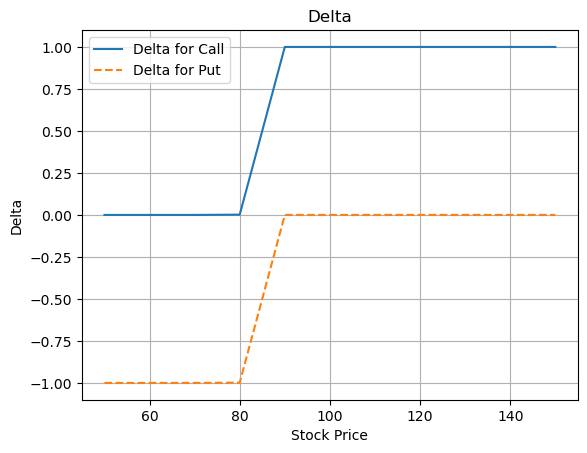

In [179]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

### Gamma

In [180]:
def gamma(S, K, T, r,  vol, payoff):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    return gamma

In [181]:
gamma(82.50, 83.50, 0.25, 0.0533, 0.02, 'call')

0.4793296114915965

In [182]:
gamma(82.50, 83.50, 0.25, 0.0533, 0.02, 'put')

0.4793296114915965

In [183]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 83.50, 0.25, 0.0533, 0.02, 'call')

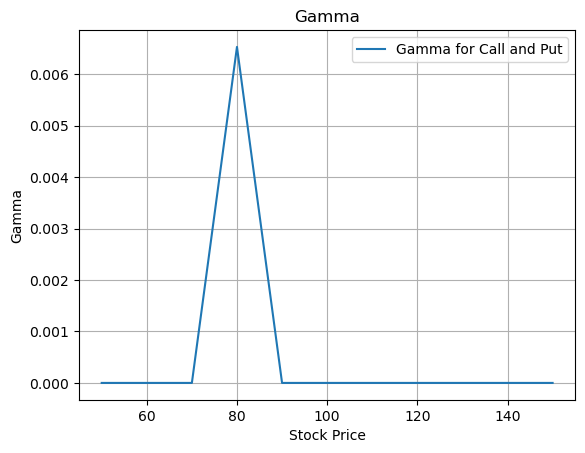

In [184]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

### Theta

In [185]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [186]:
theta(82.50, 83.50, 0.25, 0.0533, 0.02, 'call')

-3.062681990566221

In [187]:
theta(82.50, 83.50, 0.25, 0.0533, 0.02, 'put')

1.3289577916604922

In [188]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(82.50, 83.50, T[i], 0.0533, 0.02, 'call')
    Theta_Put [i] = theta(82.50, 83.50, T[i], 0.0533, 0.02, 'put')

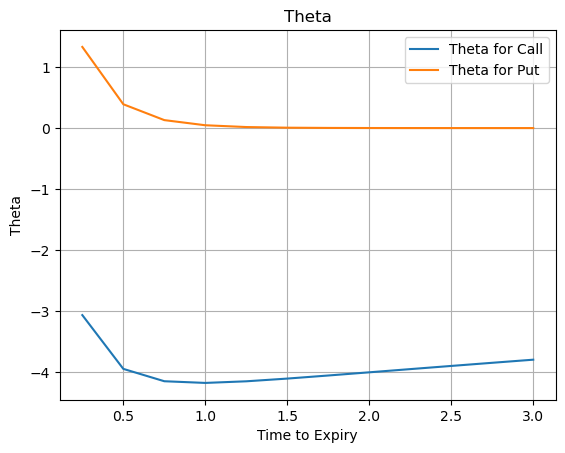

In [189]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

### Rho

In [190]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [191]:
rho(82.50, 83.50, 0.25, 0.0533, 0.02, 'call')

11.3048525184019

In [192]:
rho(82.50, 83.50, 0.25, 0.0533, 0.02, 'put')

-9.293833139321894

In [194]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(82.50, 83.50, 0.25, r[i], 0.02, 'call')
    Rho_Put [i] = rho(82.50, 83.50, 0.25, r[i], 0.02, 'put')

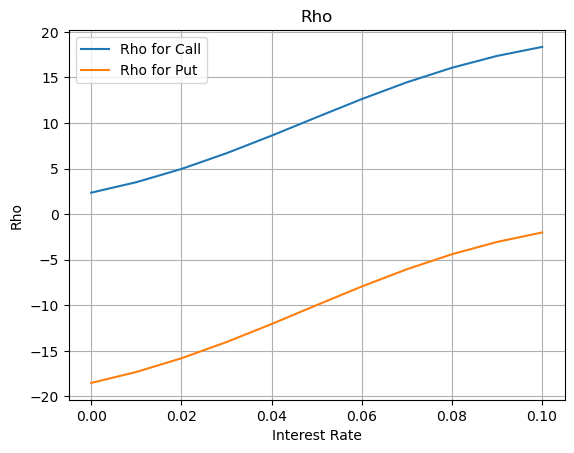

In [195]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

### Vega

In [196]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [197]:
vega(82.50, 83.50, 0.25, 0.0533, 0.02, 'call')

16.312185841073394

In [198]:
vega(82.50, 83.50, 0.25, 0.0533, 0.02, 'put')

16.312185841073394

In [199]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(82.50, 83.50, 0.25, 0.0533, vol[i], 'call')

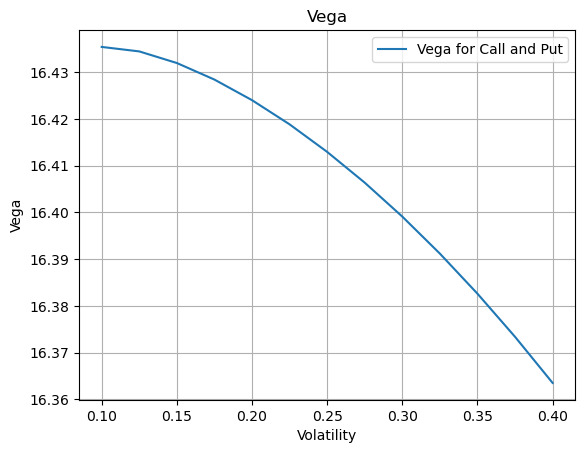

In [200]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])